Task 4
=

- Read Kumasi, Accra, Kete_krachi and Wa dataset using pandas.
- Rename the columns to suit the column elements
- Create a datetime using the columns containing, year, month and day.
- Find the annual rainfall total of all the datasets and visualise all the stations data in one figure
- Find the annual Rainfall anomalies for each station
- Visualise the yearly rainfall anomalies for each station by creating a subplot of 2 rows and 2 columns (each axis conatinaing visualisation for each station data)
-  Save your graph as pdf

## NB: 
- make sure you label all graphs
- Make use of comments and the markdown to make your script look presentable


In [1]:
import numpy as np
import matplotlib as mlp
from matplotlib import pyplot as plt
import pandas as pd

Reading the data
=

In [2]:
Accra=pd.read_fwf('C:/Users/USER/Desktop/OneQuantum-Ghana-main/GAUGE_PRECIP/Accra_1983_2017_dRR_gapless.txt', names=['Year','Month','Day','Rainfall'])
Kete=pd.read_fwf('C:/Users/USER/Desktop/OneQuantum-Ghana-main/GAUGE_PRECIP/Kete_Krachi_1983_2017_dRR_gapless.txt', names=['Year','Month','Day','Rainfall'])
kumasi=pd.read_fwf('C:/Users/USER/Desktop/OneQuantum-Ghana-main/GAUGE_PRECIP/Kumasi_1983_2017_dRR_gapless.txt', names=['Year','Month','Day','Rainfall'])
Wa=pd.read_fwf('C:/Users/USER/Desktop/OneQuantum-Ghana-main/GAUGE_PRECIP/Wa_1983_2017_dRR_gapless.txt', names=['Year','Month','Day','Rainfall'])


Converting columns to datetime
=

In [3]:
Accra['Date'] = pd.to_datetime(Accra[['Year','Month','Day']])
Kete['Date'] = pd.to_datetime(Kete[['Year','Month','Day']])
kumasi['Date'] = pd.to_datetime(kumasi[['Year','Month','Day']])
Wa['Date'] = pd.to_datetime(Wa[['Year','Month','Day']])

In [4]:
ac=Accra[['Rainfall','Date']].set_index('Date')
ke=Kete[['Rainfall','Date']].set_index('Date')
ku=kumasi[['Rainfall','Date']].set_index('Date')
wa=Wa[['Rainfall','Date']].set_index('Date')

Calculating the annual rainfall total
=

In [5]:
actotal=ac.resample('y').sum()
wtotal=wa.resample('y').sum()
ketotal=ke.resample('y').sum()
kutotal=ku.resample('y').sum()

Plotting a timeseries for all stations
=

Text(0.5, 1.0, 'Annual Rainfall Total for all Stations')

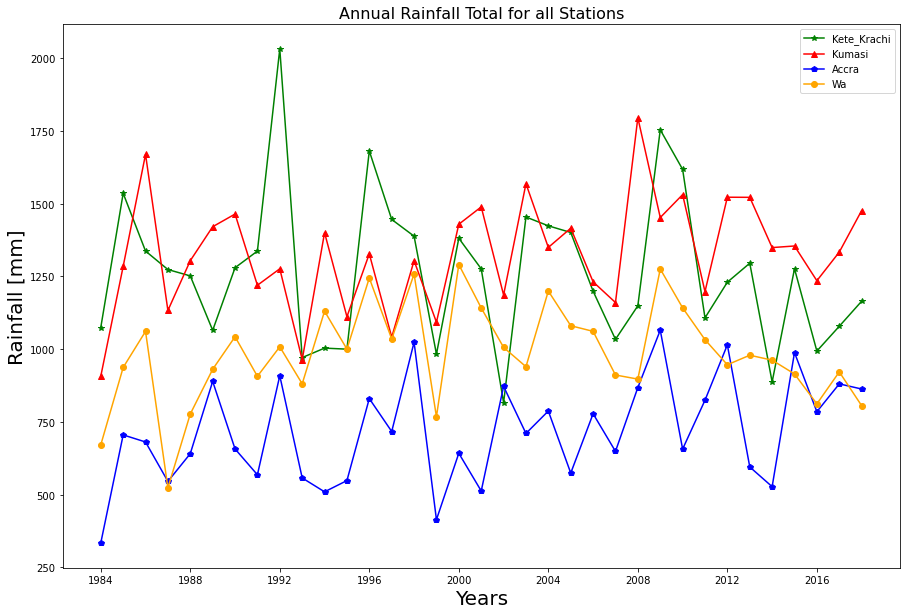

In [6]:
fig=plt.figure(figsize=(15,10))

plt.plot(ketotal,color='green', label ='Kete_Krachi', marker='*')
plt.plot(kutotal, color='red', label= 'Kumasi', marker='^')
plt.plot(actotal, color='blue', label= 'Accra', marker='p')
plt.plot(wtotal, color='orange', label= 'Wa', marker='o')

plt.legend()

plt.xlabel('Years',fontsize=20)
plt.ylabel('Rainfall [mm]', fontsize=20)
plt.title('Annual Rainfall Total for all Stations', fontsize=16)

Calculating the annual rainfall anomalies
=

In [7]:
wmean=wtotal['Rainfall'].mean()
wano=wtotal['Rainfall']-wmean

In [8]:
acmean=actotal['Rainfall'].mean()
acano=actotal['Rainfall']-acmean

In [9]:
kumean=kutotal['Rainfall'].mean()
kuano=kutotal['Rainfall']-kumean

In [10]:
kemean=ketotal['Rainfall'].mean()
keano=ketotal['Rainfall']-kemean

In [11]:
#creating a range of years
years = np.arange(1983, 2018)

In [12]:
years

array([1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017])

Creating subplots for a all stations
=

<BarContainer object of 35 artists>

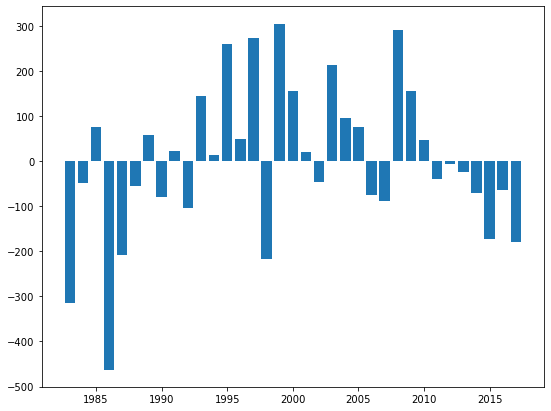

In [17]:
plt.figure(figsize=(9,7))
plt.bar(years, wano)

Text(0.5, 1.0, 'Annual Rainfall Anomalies for Accra')

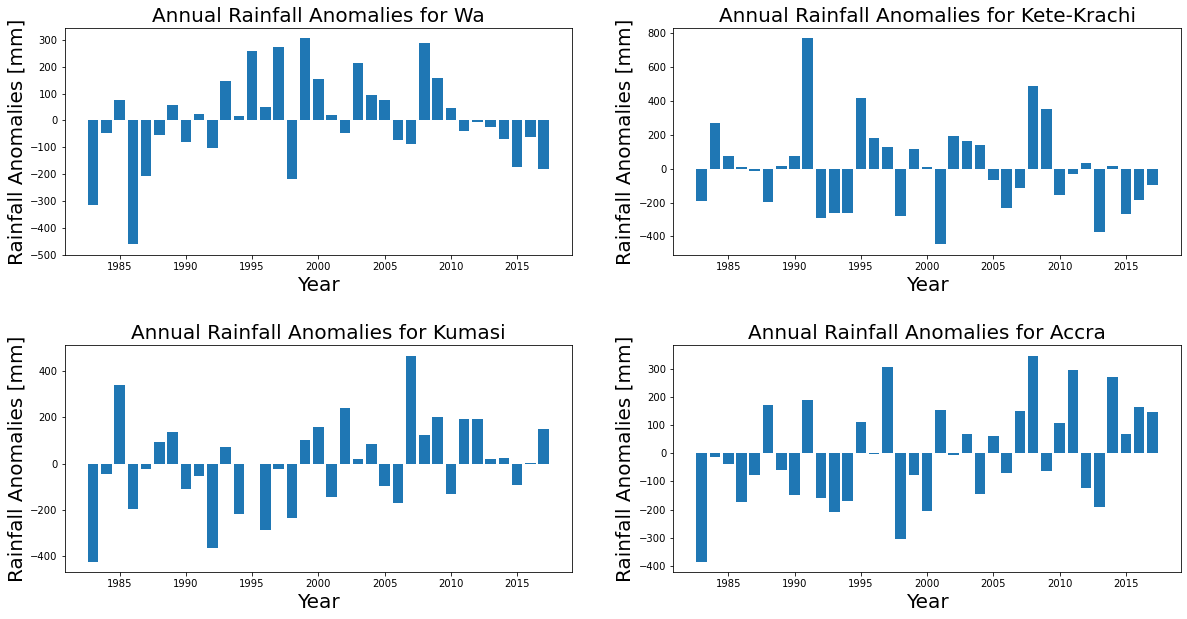

In [13]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(20, 10))
plt.subplots_adjust(hspace=0.4)
# Generate bars
ax1 = axes[0,0]
ax1.bar(years, wano)

#labeling the bars 
ax1.set_xlabel("Year", fontsize=20)
ax1.set_ylabel("Rainfall Anomalies [mm]", fontsize=20)
ax1.set_title('Annual Rainfall Anomalies for Wa',fontsize=20)

ax2 = axes[0,1]
ax2.bar(years, keano)

#labeling the bars
ax2.set_xlabel("Year", fontsize=20)
ax2.set_ylabel("Rainfall Anomalies [mm]", fontsize=20)
ax2.set_title('Annual Rainfall Anomalies for Kete-Krachi',fontsize=20)

ax3 = axes[1,0]
ax3.bar(years, kuano)

ax3.set_xlabel("Year", fontsize=20)
ax3.set_ylabel("Rainfall Anomalies [mm]", fontsize=20)
ax3.set_title('Annual Rainfall Anomalies for Kumasi',fontsize=20)

ax4 = axes[1,1]
ax4.bar(years, acano)

#labeling the bars
ax4.set_xlabel("Year", fontsize=20)
ax4.set_ylabel("Rainfall Anomalies [mm]", fontsize=20)
ax4.set_title('Annual Rainfall Anomalies for Accra',fontsize=20)